Author: Sean Tulin
<br>
Date: Feb. 27, 2023
<br>
PHYS 2030 W23

# <font color=#46769B>Lesson 7: Euler method</font>

## <font color=#46769B>Introduction</font>

Ordinary differential equations (ODEs) are ubiquitous across science and engineering. However, exact solutions to ODEs exist only for the simplest of systems. For the rest, one turns to numerical solutions. Moreover, in practice, even if an analytic solution does exist, it can be more straightforward just to solve it numerically if one wants to get the solution as quickly as possible and move on.

In this section, we introduce Euler's method, which is the simplest numerical method for solving ODEs. Euler's method is simple enough to be done by hand on a blackboard, say, by NASA mathematicians calculating [orbital trajectories of astronauts](https://www.youtube.com/watch?v=v-pbGAts_Fg). However, with the advent of modern computers, Euler's method is not of great practical importance today compared to other methods that are much more accurate. 
Yet, it is still useful as a pedagogical tool and every introduction to this subject starts with Euler's method.

Let's set the stage. We will be solving ODEs, namely, for functions $y(t)$ that have one independent variable $t$. The simplest is a __first-order ODE__ of a single function:

$$y^\prime \equiv \frac{dy}{dt} = f(t,y) \, ,$$

where the right-hand side $f(t,y)$ depends on both $t$ and $y(t)$. We also have __coupled ODEs__ where we are solving for $n$ functions 

$$y_1(t), \, y_2(t) , \, ... , \, y_n(t) ,$$ 

each still with one independent variable $t$. A system of coupled first-order ODEs is

$$y_1^\prime = f_1(t,y_1,y_2,...,y_n)$$
$$\vdots$$
$$y_n^\prime = f_n(t,y_1,y_2,...,y_n)$$

Note each function $f_1$, $f_2$, etc. is a different function, and each one depends in general on *all* of the different functions $y_{1}$, $y_{2}$, etc. that we will want to solve for. 
We can write a coupled system of first-order ODEs compactly by defining vectors

$$\mathbf{y}(t) = \left( \begin{array}{c} y_1(t) \\ \vdots \\ y_n(t) \end{array} \right) \, , \qquad 
\mathbf{f}(t,\mathbf{y}) = \left( \begin{array}{c} f_1(t,\mathbf y) \\ \vdots \\ f_n(t,\mathbf y) \end{array} \right) \, .$$

Then our system of coupled ODEs is written as 

$$\mathbf{y}^\prime = \mathbf{f}(t,\mathbf y) \, .$$

In this course, we will consider both *first-order* and *second-order* ODEs, which are by far the most prevalent types of ODEs in physical contexts.
Every second-order ODE can be written as two first-order ODEs. For example, consider the simple harmonic oscillator

$$y''(t) = - \omega^2 \, y(t) \, ,$$

where $\omega$ is a constant (angular frequency).
We can define

$$y_1(t) = y(t) \, , \qquad y_2(t) = y^\prime(t) \, .$$

Now we can write our second-order ODE as a coupled *first-order* ODE:

$$\mathbf{y}^\prime(t) = \mathbf{f}(t,\mathbf y) \quad \Rightarrow \quad \left(\begin{array}{c} y^\prime_1(t) \\  y^\prime_2(t) \end{array} \right)
= \left(\begin{array}{c} f_1(t,y_1,y_2) \\  f_2(t,y_1,y_2) \end{array} \right) 
= \left(\begin{array}{c} y_2(t) \\  -\omega^2 y_1(t) \end{array} \right) \, . $$

In general, we can always use this trick to write $n$ second-order ODEs as $2n$ first-order ODEs. Hence, our discussion will focus on solving systems of coupled *first-order* ODEs, since this can be used to solve ODEs of second-order as well (and in fact, *any* order).

Lastly, we discuss boundary conditions. When solving ODEs analytically, one often finds a general solution involving undetermined coefficients, which are later determined by fixing the boundary conditions. 
In contrast, numerical solutions to ODEs require numerical boundary conditions that are fixed from the beginning. 
Each numerical solution is unique to the boundary conditions chosen and changing boundary conditions requires re-running your code. 

Here we consider __initial value problems__ (IVPs). 
If we have a single ODE, we take the boundary condition at some initial value $t_0$, i.e.,

$$y(t_0) = y_0$$

and we solve for $y(t)$ for $t > t_0$. If we have a coupled system, we take the boundary conditions for *all* functions at an initial value $t_0$, i.e.,

$$y_1(t_0) = y_{1,0}, \; y_2(t_0) = y_{2,0} , \; ... , \; y_n(t_0) = y_{n,0}$$ 

and we solve for $y_1(t)$, $y_2(t)$, etc. for $t > t_0$. 
That is, if $t$ is time, we are setting up the system at some initial time $t_0$ and asking how it evolves after that.

This is in contrast to __boundary value problems__ (BVPs) where boundary conditions can be a mix of conditions at some initial value $t_0$ and other conditions at some final value $t_f$, and we are interested in solving for $t$ in the range $t_0 < t < t_f$. 
IVPs and BVPs have different methodologies, so here we only focus on IVPs.

## <font color=#46769B>Forward Euler Method</font>

Here we discuss the __standard Euler method__ (also known as the __forward Euler method__ for reasons that will become apparent below).

Let's consider a single first-order ODE

$$y^\prime = f(t,y)$$

with boundary condition $y(t_0) = y_0$. Our goal is to obtain a numerical solution as a list of values 

$$y(t_1) = y_1, \; y(t_2) = y_2, \; {\rm etc.}$$

where our function is evaluated at discrete points

$$t_1 = t_0 + h, \; t_2 = t_1 + h , \; {\rm etc.} ,$$

where the step size $h$ is a small positive number. (We assume that the step-size is uniform between neighboring steps, but this need not be the case.)

Suppose we know $y(t_i) = y_i$ and we want to calculate $y(t_{i+1}) = y_{i+1}$ at the next step $t_{i+1} = t_i + h$.
This is accomplished by Taylor expanding in $h$:

$$y(t_i+h) = y(t_i) + y'(t_i) h + \mathcal{O}(h^2) \, .$$

Euler's method retains only the first two terms, up to order $h$, while the the $\mathcal{O}(h^2)$ term ("order $h^2$" term) is there to remind us that we are neglecting higher-order terms that are proportional to $h^2$, $h^3$, etc. Dropping these terms and substituting in for $dy/dt$, we have

$$y_{i+1} = y_i + h \, f(t_i,y_i) \, . \qquad (1) $$

Eq. (1) is a prescription for calculating $y(t)$ iteratively, one small step $h$ at a time. Given an initial condition $y_0= y(t_0)$, we use Eq. (1) to compute $y_1$, and then $y_2$, and so on. 
This scheme is an __explicit__ method since the right-hand side of Eq. (1) depends solely on quantities that are determined in the previous step.

For coupled first-order ODEs, Euler's method straightforwardly generalizes to

$$\mathbf{y}_{i+1} = \mathbf{y}_i + h \, \mathbf{f}(t_i,\mathbf{y}_i) \, ,$$

where, e.g.,

$$\mathbf{y}_i = \mathbf{y}(t_i) = \left(\begin{array}{c} y_{1,i} \\ \vdots \\ y_{n,i} \end{array} \right) \, .$$

That is, for coupled ODEs, we are solving for values $y_{a,i} = y_a(t_i)$ where $a$ labels the function $y_1(t)$, $y_2(t)$, etc., and $i$ labels the step for the independent variable $t_i$.

## <font color=#46769B>Algorithm</font>

Let's sketch the basic steps for implementing Euler's method.
1. Define your function $f(t,y)$. It will take as input *single* numbers for $t$ and $y$, and return a number.  
2. Define your boundary condition $y(t_0) = y_0$.  
3. Define your steps: 
    - Define your interval $t_0 \le t \le t_f$ where you want to solve for $y(t)$. 
    - Divide the interval into $N$ steps, each with step-size $h$ as shown here:     
<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/steps_fig.png" width="800">
</div>

    This is easily accomplished using `numpy.linspace()` as follows:
    ```py
    t = np.linspace(t0,tf,num=num_steps+1)
    ```
    Note that the `num` keyword is the *number of points* in the interval, which is $N+1$ if we have $N$ steps. That is why we write `num=num_steps+1` here. The final point is $y_N = y_f$. We obtain the step-size $h$ as
    ```py
    h = t[1] - t[0]
    ```

4. Iterate over your time steps using a `for` loop. At each iteration, you evaluate Eq. (1), saving your results in a `list` or `numpy.array`.

For the case of coupled ODEs, the procedure is generally the same except that each $\mathbf{y}_i$ is now a one-dimensional `numpy.array` of length $n$, and similarly $\mathbf{f}(t,\mathbf y)$ must return a `numpy.array` of length $n$.

## <font color=#46769B>Examples</font>

### <font color=#46769B>Example 1: Radioactive decay</font>

An initial population of $A$ radioactive atoms decay with lifetime $\tau$.
Let $y(t)$ denote their abundance after time $t$, which is described by the following equations

$$y'(t) = -  y(t)/\tau , \quad y(0) = A \, .$$

The exact solution is

$$y(t) = A \, e^{-t/\tau} \, .$$

Here we will use Euler's method to arrive at the same solution. For simplicity, we set $A=1$ and $\tau = 1$.

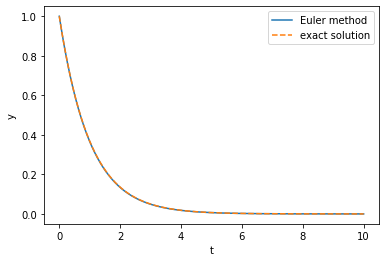

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define function f(t,y)
tau = 1
def f(t,y):
    return -y/tau

# Define boundary conditions
y0 = 1

# Define steps
num_steps = 1000
t0, tf = 0, 10
t = np.linspace(t0,tf,num=num_steps+1)
h = t[1] - t[0]

# Initialize where results will be saved
y = np.zeros(num_steps+1)
y[0] = y0

# Iterate
for i in range(num_steps):

    ti = t[i]
    yi = y[i]
    y[i+1] = yi + h*f(ti,yi)
    
# Show the results
plt.plot(t,y,label='Euler method')

# Exact result
plt.plot(t,np.exp(-(t-t0)/tau),'--',label='exact solution')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

### <font color=#46769B>Example 2: Simple harmonic oscillator</font>

Let's consider the ODE for simple harmonic oscillator 

$$y''(t) = -\omega^2 y(t) \, ,$$ 

with the boundary condition $y(0) = 1$ and $y'(0) = 0$. The exact solution is $y(t) = \cos(\omega t)$.

We showed that we can express this as a system of coupled first-order ODEs, $\mathbf{y}^\prime(t) = \mathbf{f}(t,\mathbf y)$, where $y_1(t) = y(t)$, $y_2(t) = y'(t)$, and 

$$ \mathbf{f}(t,\mathbf y) = \left(\begin{array}{c} y_2(t) \\  -\omega^2 y_1(t) \end{array} \right) \, . $$

Here, the boundary condition becomes

$$\mathbf{y}_0 = \left( \begin{array}{c} 1 \\ 0 \end{array} \right) \, .$$

Let's obtain the solution using Euler's method, e.g., for $\omega=1$.

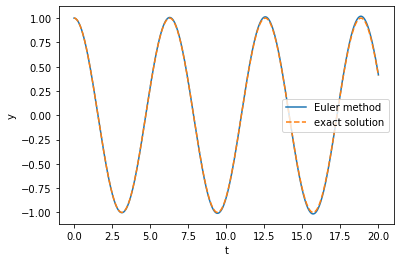

In [2]:
# Define function f(t,y)
omega = 1
def f(t,y):
    y1, y2 = y
    return np.array([y2,-omega**2*y1])

# Boundary conditions
y0 = np.array([1,0])

# Define steps
num_steps = 10000
t0, tf = 0, 20
t = np.linspace(t0,tf,num=num_steps+1)
h = t[1] - t[0]

# Initialize where results will be saved
y = np.zeros((num_steps+1,2))
y[0] = y0

# Iterate
for i in range(num_steps):

    ti = t[i]
    yi = y[i]
    y[i+1] = yi + h*f(ti,yi)
    
# Show the results
plt.plot(t,y[:,0],label='Euler method')

# Exact result
plt.plot(t,np.cos(omega*t),'--',label='exact solution')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

## <font color=#46769B>Errors and convergence</font>

Numerical solutions are not exact solutions. Numerical algorithms rely on performing a Taylor expansion in the step-size $h$ and making an approximation that we keep only the leading terms. Clearly, making $h$ as small as possible will improve the accuracy. But different algorithms can differ in how the error scales with $h$.

### <font color=#46769B>Local vs global errors</font>

There are two types of error commonly discussed:
- __Local error__ is the error incurred *at each step*.
- __Global error__ is the total error incurred after *all* steps, i.e., from $t_0$ to $t_f$. 

Euler's method is termed a __first-order__ method, which means that we keep only the terms that are first-order in $h$, but we neglect $\mathcal{O}(h^2)$ terms. Thus, the local error is $\mathcal{O}(h^2)$, meaning that the local error scales with the *square of* $h$.

The global error is always one power of $h$ less than the local error.
We can think of the global error as a the local error (error per step) times the number of steps, which is $N = (t_f - t_0)/h$. The number of steps *grows* as $h$ becomes smaller. For Euler's method, the global error is $\mathcal{O}(h)$, meaning that it scales linearly with $h$.

We can also consider how the error scales with the number of steps $N$ (keeping $t_0,t_f$ fixed). Since $h$ is proportional to $1/N$, Euler's method has a local error that scales as $1/N^2$ and a global error that scales as $1/N$.

### <font color=#46769B>Example: Compare vs exact solution</font>

Let's consider *Example 1: Radioactive decay* and check that our errors behave as described above. The exact solution is $y_{\rm exact}(t) = y_0 e^{-(t-t_0)/\tau}$.
- For the local error, we consider the fractional error *after the first step*: 

$$\frac{y_{\rm exact}(t_1) - y_1}{y_{\rm exact}(t_1)}$$ 

- For the global error, we consider the fractional error *after $N$ steps*: 

$$\frac{y_{\rm exact}(t_f) - y_{N}}{y_{\rm exact}(t_f)}$$ 

The code below plots these errors for different values of $N$. We also compare these results to our prediction that the local and global errors scale with $\frac{1}{N^2}$ and $\frac{1}{N}$, respectively.

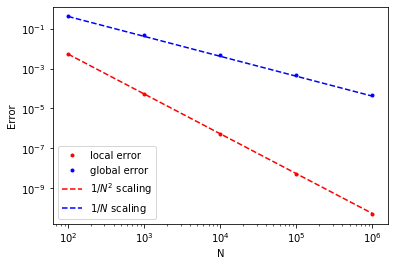

In [3]:
# Define function f(t,y)
tau = 1
def f(t,y):
    return -y/tau

# Define the t interval and boundary condition at t0
t0, tf = 0, 10
y0 = 1

# Define exact solution
def y_exact(t):
    return y0*np.exp(-(t-t0)/tau)

# This function is our algorithm for the Euler method, for given number of steps
def Euler_method(num_steps):
    
    t = np.linspace(t0,tf,num=num_steps+1)
    h = t[1] - t[0]
    
    # Initialize where results will be saved
    y = np.zeros(num_steps+1)
    y[0] = y0

    # Iterate
    for i in range(num_steps):

        ti = t[i]
        yi = y[i]
        y[i+1] = yi + h*f(ti,yi)
        
    return y

# Perform Euler method for these number of steps
steps_list = [10**2, 10**3, 10**4, 10**5, 10**6]

# Initialize where to save our errors for each number of steps
global_error = []
local_error = []

# Perform Euler method for each different number of steps
# and compute the local and global error each time
for num_steps in steps_list:

    y = Euler_method(num_steps)
    h = (tf-t0)/num_steps

    local_error.append((y_exact(h)-y[1])/y_exact(h))
    global_error.append((y_exact(tf)-y[-1])/y_exact(tf))
    
# Plot our results 

plt.loglog(steps_list,local_error,'r.',label='local error')
plt.loglog(steps_list,global_error,'b.',label='global error')

# Let's compare to our predictions

# Prediction for local error
local_error_prediction = local_error[0]*(np.array(steps_list,dtype=float)/steps_list[0])**-2
plt.loglog(steps_list,local_error_prediction,'r--',label=r'$1/N^2$ scaling')

# Prediction for global error
local_error_prediction = global_error[0]*(np.array(steps_list,dtype=float)/steps_list[0])**-1
plt.loglog(steps_list,local_error_prediction,'b--',label=r'$1/N$ scaling')

plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.show()

### <font color=#46769B>Convergence</font>

The above example is just meant to illustrate explicitly local errors, global errors, and how they behave. In practice, we don't estimate errors by comparing to an exact solution. Likely there is no analytic exact solution!

How then do we estimate how close our results are to the exact solution? We can compare two *numerical* solutions. The simplest way to do this is to run the Euler method (or any method) for one step-size $h$ and then run again with a step-size that is half as big, $\frac{h}{2}$. We compare the two solutions. If they agree within the desired level of accuracy, we stop. If not, we continue the process, decreasing the step-size by half again, and so on.

A useful function for checking how close two solutions are is `numpy.allclose()`, which is documented [here](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html). This function compares two arrays of the same length, e.g., suppose `a` and `b` are two numpy arrays of the same length, then
```py
numpy.allclose(a,b)
```
will compare the two arrays element-by-element. If `a[0]` is close to `b[0]`, *and* `a[1]` is close to `b[1]`, *and* `a[2]` is close to `b[2]`, etc. for the entire arrays, then `numpy.allclose` will return `True` (and otherwise it returns `False`).

How close is close? This is controlled by keywords `atol` (absolute tolerance) and `rtol` (relative tolerance). If each pair of elements `a[i]`,`b[i]` satisfy the condition

$$|\mathtt{a[i]} - \mathtt{b[i]}| \le (\mathtt{atol} + \mathtt{rtol} * |\mathtt{b[i]}|)$$

then the two arrays are "close."

Lastly, when we compare two numerical solutions, we want to be sure we are comparing elements that correspond to the *same* value of $t$. Our first solution will has $N$ steps, while our second solution has $2N$ steps. So, we should take only *every other* point from our second solution.

Here is a code that implements all this for *Example 1: Radioactive decay*. We use a `while` loop to keep iterating, doubling the number of steps each time, until a variable `converged` is equal to `True`, meaning our solution *has* converged. 

Not converged yet. Trying 200 steps.
Not converged yet. Trying 400 steps.
Not converged yet. Trying 800 steps.
Not converged yet. Trying 1600 steps.
Not converged yet. Trying 3200 steps.
Not converged yet. Trying 6400 steps.
Not converged yet. Trying 12800 steps.
Not converged yet. Trying 25600 steps.
Not converged yet. Trying 51200 steps.
Converged with 51200 steps.


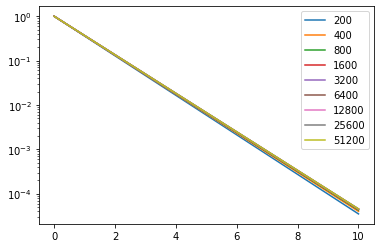

In [4]:
# Define function f(t,y)
tau = 1
def f(t,y):
    return -y/tau

t0, tf = 0, 10
y0 = 1

# This function is our algorithm for the Euler method, for given number of steps
def Euler_method(num_steps):
    
    t = np.linspace(t0,tf,num=num_steps+1)
    h = t[1] - t[0]
    
    # Initialize where results will be saved
    y = np.zeros(num_steps+1)
    y[0] = y0

    # Iterate
    for i in range(num_steps):

        ti = t[i]
        yi = y[i]
        y[i+1] = yi + h*f(ti,yi)
        
    # Returns both t values and solution y
    return t, y

# Starting number of steps
num_steps = 100

t, y_old = Euler_method(num_steps)

converged = False

while not(converged):
    
    # Try double steps
    num_steps = 2*num_steps
    print("Not converged yet. Trying", num_steps, "steps.")
    t, y_new = Euler_method(num_steps)
    converged = np.allclose(y_old,y_new[::2],atol=0,rtol=1e-3)
    y_old = y_new

    # Make a plot
    plt.plot(t,y_new,label=num_steps)
    
print("Converged with", num_steps, "steps.")

plt.yscale('log')
plt.legend()
plt.show()

## <font color=#46769B>SciPy: Built-in functions for solving ODEs</font>

As we explore the topic of numerical solutions to ODEs, it is useful to know how to use existing packages that are already available in Python. Here we will focus the function `scipy.integrate.solve_ivp`, which is documented [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

The `scipy` package is a vast code library for scientific computing and numerical methods and `scipy.integrate` is a package with methods for numerical integration and solving diffential equations. The function `solve_ivp` is used for solving initial value problems as we are considering here.

You are encouraged to use `solve_ivp` in parallel to your own code. For situations where the analytic solution does not exist, it is useful to have a cross-check on your work.

The syntax is:
```py
sol = solve_ivp(f, [t0,tf], y0, t_eval=t)
```
where
- `f` is a function $f(t,y)$. (Note that the $t$ argument comes first, the $y$ argument comes second. This is consistent with how we have defined everything.)
- `t_0` and `t_f` are the initial and final values of $t$.
- `y0` is the initial condition. Note $y_0$ must be a list or array, even if you only have a single ODE.
- `t_eval=t` tells the solver what values of $t_i$ for which you want to return $y_i$.

The output of `solve_ivp()` is an object (here we call it `sol`) that contains several pieces of information that we can access using `.`. `sol.y` returns the values of $y$ corresponding to the list of $t$ values we want, defined in `t`. If we have a coupled system, then `sol.y[0]` will access $y_{1,i}$ at all values $t_i$, i.e., 

$$y_1(t_0), \; y_1(t_1), \; y_{1}(t_2) , \; {\rm etc.}$$

and similarly `sol.y[1]` will access $y_2(t)$ at all values of $t_i$, etc.
If we only have a single ODE, then you still have to use the same syntax, `sol.y[0]`, to access all values of $y_i$ even though there is just one function $y(t)$ that is being solved for.

You can also specify keywords `atol` and `rtol` in `solve_ivp` if you want to adjust the tolerance for how it decides when the numerical solution has converged. 

Let's see how this works in practice.

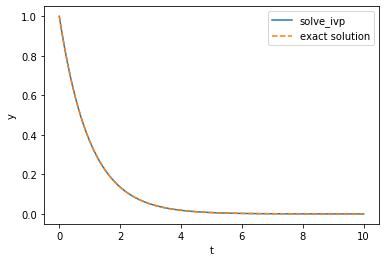

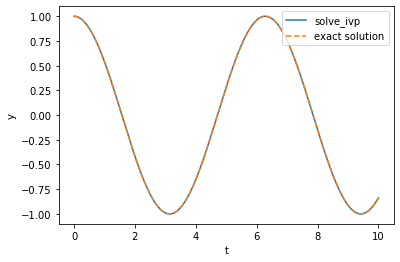

In [5]:
from scipy.integrate import solve_ivp

# Radioactive decay

# Define function f(t,y)
tau = 1
def f(t,y):
    return -y/tau

# Define the t interval and boundary condition at t0
t0, tf = 0, 10
y0 = [1] # Note must be list or array even if just one element

# Define t values
num_steps = 1000
t = np.linspace(t0,tf,num=num_steps+1)

# Do solve_ivp
sol = solve_ivp(f, [t0,tf], y0, t_eval=t)
y = sol.y[0]
plt.plot(t,y,label='solve_ivp')

# Exact result
plt.plot(t,np.exp(-(t-t0)/tau),'--',label='exact solution')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

# Simple harmonic oscillator

# Define function f(t,y)
omega = 1
def f(t,y):
    y1, y2 = y
    return np.array([y2,-omega**2*y1])

# Define the t interval and boundary condition at t0
t0, tf = 0, 10
y0 = [1,0]

# Define t values
num_steps = 1000
t = np.linspace(t0,tf,num=num_steps+1)

# Do solve_ivp
sol = solve_ivp(f, [t0,tf], y0, t_eval=t)
y = sol.y[0]
plt.plot(t,y,label='solve_ivp')

# Exact result
plt.plot(t,np.cos(omega*t),'--',label='exact solution')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

## <font color=#46769B>Implicit methods: backward Euler method</font>

A variant of Euler's method is known as the __backward Euler method__. The starting point is the same Taylor expansion we had above, but for a small step $h$ in the *backward* direction.

$$y(t_i-h) = y(t_i) - y'(t_i) h + \mathcal{O}(h^2) \, .$$

This gives a relationship between $y_i = y(t_i)$ and its *previous* value $y_{i-1} = y(t_{i-1})$:

$$y_{i-1} = y_i - h \, f(t_i,y_i) \, . $$

Let's shift all the indices by 1 and we have

$$y_{i} = y_{i+1} - h \, f(t_{i+1},y_{i+1}) \, . $$

Rearranging the terms we have

$$y_{i+1} = y_{i} + h \, f(t_{i+1},y_{i+1}) \, . \qquad (2)$$

Superficially, this looks similar to Eq. (1). And as in Eq. (1), we still want to solve for $y_{i+1}$ given the previous value $y_i$ at the previous step. However, there is an important difference in that the right-hand side is no longer just depends on the previous value $y_i$, but it depends on $y_{i+1}$ which is the quantity we want to compute. 

This is known as an __implicit method__. This means that for each iteration, to calculate $y_{i+1}$ at the next step given $y_i$ at the previous step, we are required to solve an algebraic equation. For an explicit method, solving an algebraic equation is not necessary.

For a system of coupled ODEs, Eq. (2) generalizes to
$$\mathbf{y}_{i+1} = \mathbf{y}_{i} + h \, \mathbf{f}(t_{i+1},\mathbf{y}_{i+1}) \, .$$
That is, we have to solve a *system* of $n$ algebraic equations to determine $\mathbf{y}_{i+1}$ given $\mathbf{y}_i$.

The algebraic solution to Eq. (2) depends on our ODE. Let's consider some examples to see how this works in practice.

### <font color=#46769B>Example 3: Radioactive decay with backward Euler method</font>

We consider the radioactive decay example above, now using the *backward Euler method*. Since $f(t,y) = -y(t)/\tau$, Eq. (2) is

$$y_{i+1} = y_i - \frac{h}{\tau} y_{i+1} \, .$$

We solve this algebraic equation for $y_{i+1}$, finding

$$y_{i+1} = \frac{y_i}{1 + \frac{h}{\tau}} \, .$$

Now we can implement the method as follows.


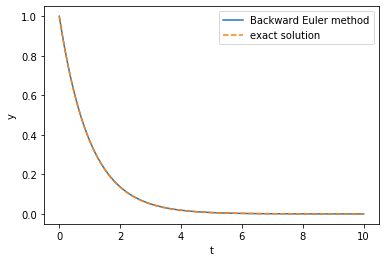

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define tau
tau = 1

# Boundary conditions
y0 = 1

# Define steps
num_steps = 1000
t0, tf = 0, 10
t = np.linspace(t0,tf,num=num_steps)
h = t[1] - t[0]

# Initialize where results will be saved
y = np.zeros(num_steps)
y[0] = y0

# Iterate
for i in range(num_steps-1):

    ti = t[i]
    yi = y[i]
    y[i+1] = yi/(1+h/tau)
    
# Show the results
plt.plot(t,y,label='Backward Euler method')

# Exact result
plt.plot(t,np.exp(-t/tau),'--',label='exact solution')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

### <font color=#46769B>Example 4: Simple harmonic oscillator with backward Euler method</font>

Before we start coding, we need to do some analytic steps in order to solve the algebraic equations

$$\mathbf{y}_{i+1} = \mathbf{y}_i + h \, \mathbf{f}(t_{i+1},\mathbf{y}_{i+1}) . \qquad (3)$$

We can write $\mathbf{f}(t_{i+1},\mathbf{y}_{i+1})$ as a matrix expression

$$\mathbf{f}(t_{i+1},\mathbf{y}_{i+1}) = \left(\begin{array}{c} y_{2,i+1} \\ - \omega^2 y_{1,i+1} \end{array} \right) 
= \left( \begin{array}{cc} 0 & 1 \\ -\omega^2 & 0 \end{array} \right) \mathbf{y}_{i+1} \, .$$

Plugging in and rearranging the terms of Eq. (3), we have

$$\left( \begin{array}{cc} 1 & -h \\ \omega^2 h & 1 \end{array} \right) \mathbf{y}_{i+1} = \mathbf{y}_i \, .$$

We invert the matrix to solve for $\mathbf{y}_{i+1}$ in terms of $\mathbf{y}_i$:

$$\mathbf{y}_{i+1} = \underbrace{\frac{1}{1 + h^2 \omega^2} \left( \begin{array}{cc} 1 & h \\ - \omega^2 h & 1 \end{array} \right)}_{A} \mathbf{y}_i \, ,$$

where we define a matrix $A$ as indicated in this equation. Now we can code this up. 



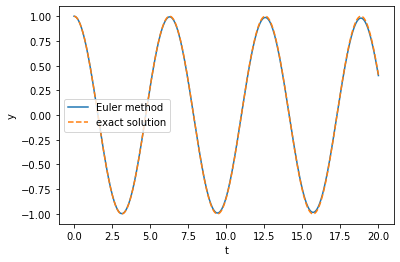

In [7]:
# Define omega
omega = 1

# Boundary conditions
y0 = np.array([1,0])

# Define steps
num_steps = 10000
t0, tf = 0, 20
t = np.linspace(t0,tf,num=num_steps)
h = t[1] - t[0]

# Initialize where results will be saved
y = np.zeros((num_steps,2))
y[0] = y0

# Define matrix A
A = np.array([[1,h],[-omega**2*h,1]])/(1+h**2*omega**2)

# Iterate
for i in range(num_steps-1):

    ti = t[i]
    yi = y[i]
    y[i+1] = A @ yi # Note the matrix multiplication
    
# Show the results
plt.plot(t,y[:,0],label='Euler method')

# Exact result
plt.plot(t,np.cos(omega*t),'--',label='exact solution')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()